In [42]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
import datetime
from dateutil.parser import parse
%matplotlib inline

df = pd.read_csv("Z:\HY_FA Returns_RawData3.csv")
df3 = pd.read_csv("Z:\HY_FA Returns_RawData2.csv")


Abstract: 
In this project we will seek to see if 'Fallen Angel Bonds' earn excess returns over the standard High Yield Bond Index over time. 

Backround:
Insurance companies, mutual funds, and high yield focused mutual funds directed at high net worth individuals make up roughly 80% of the market versus 60% 10 years earlier. These types of investors have rigid constraints and/or are subject to rigid legal regulations around portfolio construction and composition.

Traditionally, there are large barriers to entry to entering the high yield bond space as a fund manager. A high yield investment group will typically need to have a team with at least 8-10 people including one or multiple portfolio managers, analysts for each sector, and traders to monitor markets and execute trades. 

Due to low global interest rates, the demand for high yield corporate credit exposure has increased over recent years by non-traditional investors looking to earn extra yield. 

Low liquidity of corporate bonds combined with the aforementioned increased demand for high yield exposure has lead to a proliferation of “beta” products like High Yield ETFs and High Yield total return swaps that serve to track the return of high yield indexes for smaller fees.

Is there a way to take advantage to the structural setup of the HY market (i.e. heavily regulated or rigid investors) to earn excess returns that can beat the performance of the new beta products? Specific to this project, do Fallen Angel bonds offer excess returns over the High Yield Index over time. 

What is a Fallen Angel and what are its characteristics?

Investment grade portfolios, under regulations and portfolio constraints, are forced to sell these bonds when they are downgraded below investment grade status

These are big companies, high quality companies (e.g. Sprint, YUM! Brands, JC Penney, Continental Resources

Company management has incentives to bring the ratings back up to investment grade quickly 

Investment grade bonds tend to have attractive call features which is beneficial when spreads tighten and the bond price goes up. 


In [2]:
for x in df.columns.values:
    print x

Date
Class
OAS
WARF
ER_M
Trl_12M_ER


Dataset: Barclays High Yield Index with Fallen Angels Sub-Index from 6/30/97 to 7/31/15

Attributes:
Class-HY = High Yield Index and FA = Fallen Angel Index

OAS(Option Adjusted Spread)-Yield spread added to the benchmark yield curve. It can be viewed as the extra premium investors require to hold a riskier bond or expected outperformance

WARF(Weighted Average Rating Factor)-A numerical represenation of an bond issuers credit rating

ER_M (Monthly Excess Returns)-Monthly returns of the index over the its applicable government benchmark bonds

Trl_12M_ER (Trailing 1-year Excess Returns)-1y trailing returns of the index over its applicable government bond benchmark

In [3]:
print df.shape
print df.dtypes
df.groupby('Class').describe()

(438, 6)
Date           object
Class          object
OAS           float64
WARF          float64
ER_M          float64
Trl_12M_ER    float64
dtype: object


ER_M          OAS  Trl_12M_ER         WARF
Class                                                        
FA    count  219.000000   219.000000  219.000000   219.000000
      mean     0.437741   493.903330    5.940631  2217.051323
      std      3.339246   297.400382   15.415901   564.023888
      min    -16.903170    98.434389  -41.701758  1089.394103
      25%     -0.680348   320.422205   -2.307634  1912.516217
      50%      0.508136   409.539837    5.043336  2149.727154
      75%      1.693797   580.586544   11.016680  2509.625961
      max     14.305583  2168.686985   80.711157  4294.971785
HY    count  219.000000   219.000000  219.000000   219.000000
      mean     0.125911   548.663136    1.918507  2816.609286
      std      3.074964   253.690081   14.036210   194.102819
      min    -16.451129    45.666083  -38.248613  2459.991621
      25%     -0.947605   378.066379   -6.311219  2699.914609
      50%      0.230338   505.259508    1.125060  2785.197795
      75%      1.420485   660.784037    8.914347  2904.073027
      max     12.793891  1801.705926   59.359183  3464.829626

In [13]:
df.groupby('Class').corr()

ER_M       OAS  Trl_12M_ER      WARF
Class                                                     
FA    ER_M        1.000000  0.201797    0.045726  0.199204
      OAS         0.201797  1.000000    0.735149  0.763483
      Trl_12M_ER  0.045726  0.735149    1.000000  0.588560
      WARF        0.199204  0.763483    0.588560  1.000000
HY    ER_M        1.000000  0.128729    0.067229  0.209771
      OAS         0.128729  1.000000    0.599478  0.305194
      Trl_12M_ER  0.067229  0.599478    1.000000  0.389771
      WARF        0.209771  0.305194    0.389771  1.000000

In [14]:
df.groupby('Class').median()

,OAS,WARF,ER_M,Trl_12M_ER
Class,,,,
FA,409.539837,2149.727154,0.508136,5.043336
HY,505.259508,2785.197795,0.230338,1.125060


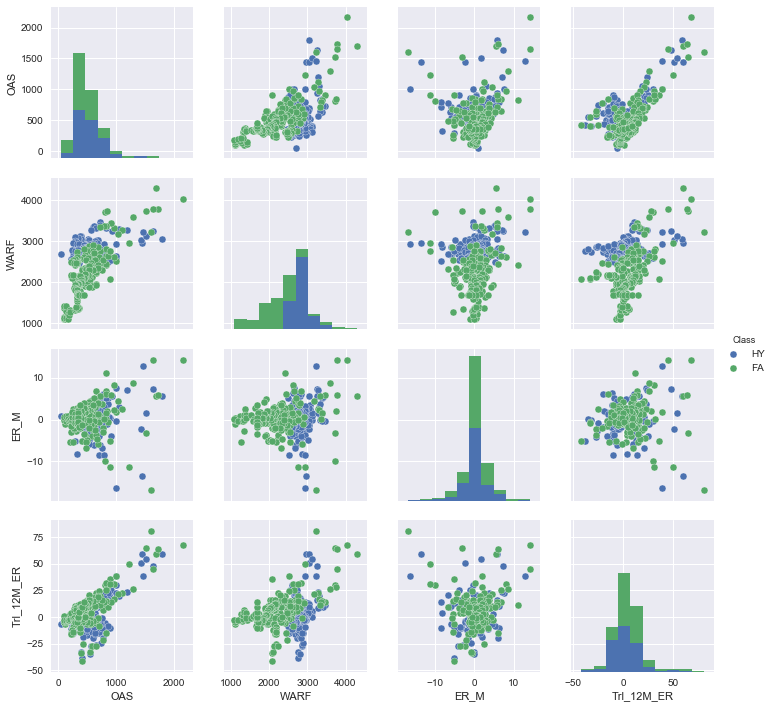

In [18]:
sns.pairplot(df, hue="Class")
sns.plt.show()

In [9]:
FA_data=df[df.Class == "FA"]
HY_data=df[df.Class == "HY"]

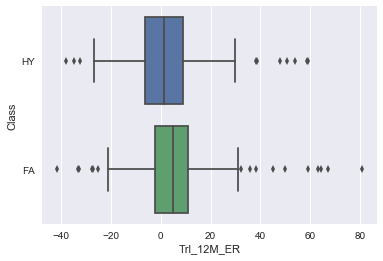

In [15]:
sns.boxplot(x='Trl_12M_ER', y='Class', data = df)

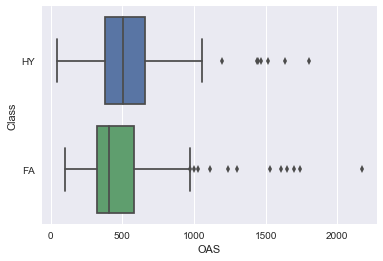

In [16]:
sns.boxplot(x='OAS', y='Class', data = df)

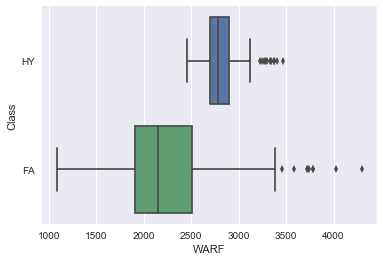

In [17]:
sns.boxplot(x='WARF', y='Class', data = df)

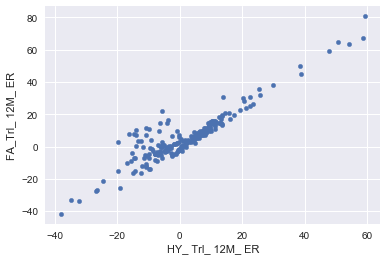

In [43]:

df3.plot.scatter('HY_ Trl_ 12M_ ER','FA_Trl_ 12M_ ER')

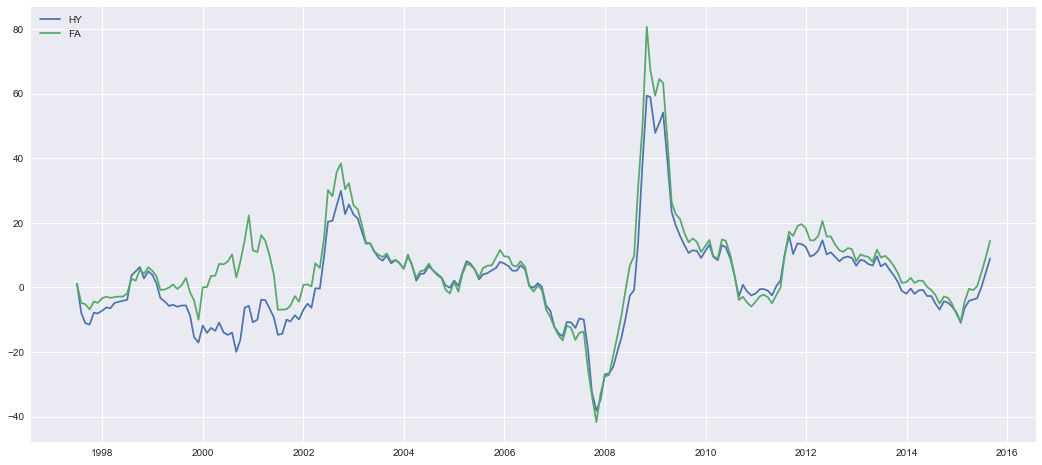

In [46]:
x2 = pd.to_datetime(HY_data['Date'], errors='coerce')
#x = HY_data['Date'].astype('datetime64[ns]')
y1 = HY_data['Trl_12M_ER']
y2= FA_data['Trl_12M_ER']


plt.figure(figsize=(18, 8))
plt.plot(x2,y1, label='HY')
plt.plot(x2,y2, label='FA')
plt.legend(loc='upper left')

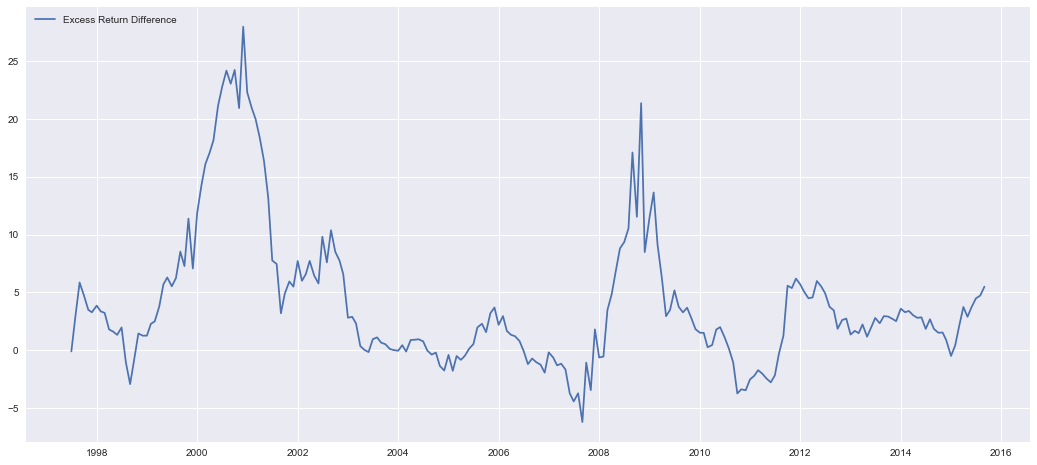

In [44]:
#Subtract FA - HY Trl_12m_ER's and add to a new df
df2 = pd.DataFrame({'Date': df.Date})
df2 = pd.merge(df2, HY_data[['Date', 'Trl_12M_ER']], on='Date')
df2 = df2.rename(columns={'Trl_12M_ER': 'HY_Return'})
df2 = pd.merge(df2, FA_data[['Date', 'Trl_12M_ER']], on='Date')
df2 = df2.rename(columns={'Trl_12M_ER': 'FA_Return'})
df2['ER_Diff']=df2.FA_Return-df2.HY_Return
#Time Series of Return Differences
a1 = pd.to_datetime(df2['Date'], errors='coerce')
b1 = df2['ER_Diff']

plt.figure(figsize=(18, 8))
plt.plot(a1,b1, label='Excess Return Difference')
plt.legend(loc='upper left')

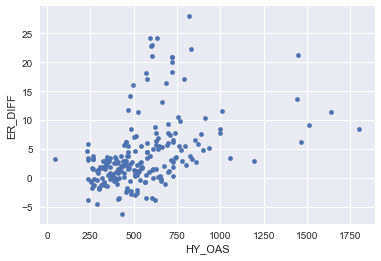

In [51]:
df3.plot.scatter('HY_OAS','ER_DIFF')


In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pandas.DataFrame(x_scaled)

Discussion:

Fallen Angel bonds outperform the High Yield Index despite having a lower OAS and WARF, though the standard deviation of returns is lightly higher. The higher standard devation of excess returns can most likely be attributable to the higher duration of investment grade bonds compared to high yield bonds. The structural components of the bond market discussed previously indicate there is the opportunity for investors to outperform the HY index by allocating a portion of their portfolio to the Fallen Angels.

The excess returns of Fallen Angels are highly correlated to the level of OAS. Furthermore, the difference in excess returns between FA and HY exhibits a mean reverting relationship. Except when OAS is really tight (i.e. bonds are expensive), Fallen Angels have consistently outperformed the HY Index. Lastly, it is important to note that Fallen Angel bonds are more liquid and easier to trade then HY bonds. 







Next Steps:

    Other Alpha Strategies-Search for other potential classifications of bonds that earn excess returns to the HY index under certain scenarios. Some examples include comparing the HY Credit Default Index vs HY bond index, distressed debt, bonds with different ratings, etc

Data Needs:
    Constiuent data of the various indexes from each point in the time period
    Potential other data for other alfa sources 

Portfolio Construction and Simulation:
    Run a regression across the alfa factors and the HYG ETF against current market conditions to build a desired    portfolio weights.
    Build a sampling process that creates a subset of bonds in each alfa bucket that mimics the characteristics and erturns of each bucket's representative population
    Run a backtest/simulation from 7/31/15 to the current day to test the predictors against actual market returns. 
 

